In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
# Shape of each dataset after some filtering:
print(reviews.shape)
print(ratings.shape)
print(sales.shape)

(28470, 10)
(2393, 34)
(19689, 6)


In [100]:
# Reviews Dataset

# Notes:
# The original price / discount price has a lot of missing and erroneous values, so we shouldn't use it
# I used regex to split up the recent and all review columns into 3 new columns each
# I made frequency plots for both popular tags and achievements

rw = pd.read_csv('data/reviews.csv')
reviews = rw.loc[:, ['name', 'recent_reviews', 'all_reviews', 
#                      'release_date', 'developer', 'publisher', 'genre', 'languages'
                     'popular_tags', 'achievements',
#                      'original_price', 'discount_price'
                    ]]
# reviews.dropna(subset=['recent_reviews', 'all_reviews'], inplace=True) #this takes it from 40833 rows to 2700
# reviews.dropna(subset=['recent_reviews'], inplace=True) #this takes it from 40833 rows to 2706
reviews.dropna(subset=['all_reviews'], inplace=True) #this takes it from 40833 rows to 28470


# use regex to separate out the numbers in recent and all reviews
pattern = r'([a-zA-Z\s]+),\(([\d,]+)\),-\s(\d+)%' #will handle if the number has a comma

# create the 3 new columns for recent and all reviews
reviews[['recent_sentiment', 'recent_review_number', 'recent_positive_percentage']] = reviews['recent_reviews'].str.extract(pattern)
reviews[['all_sentiment', 'all_review_number', 'all_positive_percentage']] = reviews['all_reviews'].str.extract(pattern)

reviews['recent_review_number'] = reviews['recent_review_number'].str.replace(',', '')
reviews['recent_review_number'] = pd.to_numeric(reviews['recent_review_number'])
reviews['recent_positive_percentage'] = pd.to_numeric(reviews['recent_positive_percentage'])

reviews['all_review_number'] = reviews['all_review_number'].str.replace(',', '')
reviews['all_review_number'] = pd.to_numeric(reviews['all_review_number'])
reviews['all_positive_percentage'] = pd.to_numeric(reviews['all_positive_percentage'])
reviews.drop(columns=['recent_reviews', 'all_reviews'], inplace=True)

# String off the $ from the prices
# reviews['original_price'] = reviews['original_price'].str.replace('$', '')
# reviews['discount_price'] = reviews['discount_price'].str.replace('$', '')

reviews.reset_index(inplace=True)
reviews.head()
# reviews.count()

# reviews
# reviews.dtypes
reviews.describe()

,index,achievements,recent_review_number,recent_positive_percentage,all_review_number,all_positive_percentage
count,28470.000000,11717.000000,2700.000000,2700.000000,1.734800e+04,17348.000000
mean,15964.156445,79.444909,116.115185,77.340741,1.520218e+03,74.704519
std,9157.139974,457.364437,775.444557,17.145094,2.723234e+04,18.580072
min,0.000000,1.000000,10.000000,0.000000,1.000000e+01,0.000000
25%,8371.250000,12.000000,15.000000,68.000000,2.300000e+01,64.000000
50%,15942.500000,21.000000,28.000000,81.000000,6.300000e+01,79.000000
75%,23831.750000,38.000000,66.000000,90.000000,2.970000e+02,89.000000
max,40811.000000,9821.000000,36076.000000,100.000000,3.094223e+06,100.000000


/var/folders/xb/kh9kw84n5k57h6w4jp5kr23m0000gn/T/ipykernel_48037/3330313195.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Tag', data=tag_counts.head(30), palette='viridis')


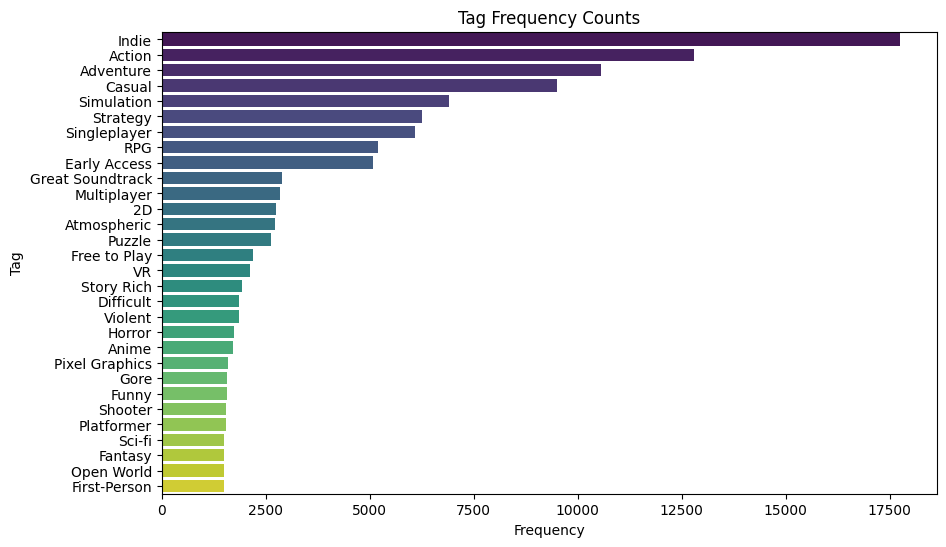

In [90]:
# Creates a plot for frequency counts of Tags (30 most frequent)

all_tags = [tag for tags in reviews['popular_tags'].str.split(',') if isinstance(tags, list) for tag in tags]

# Create a DataFrame with tag frequencies
tag_counts = pd.Series(all_tags).value_counts().reset_index()
tag_counts.columns = ['Tag', 'Frequency']

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Tag', data=tag_counts.head(30), palette='viridis')
plt.title('Tag Frequency Counts')
plt.xlabel('Frequency')
plt.ylabel('Tag')
plt.show()

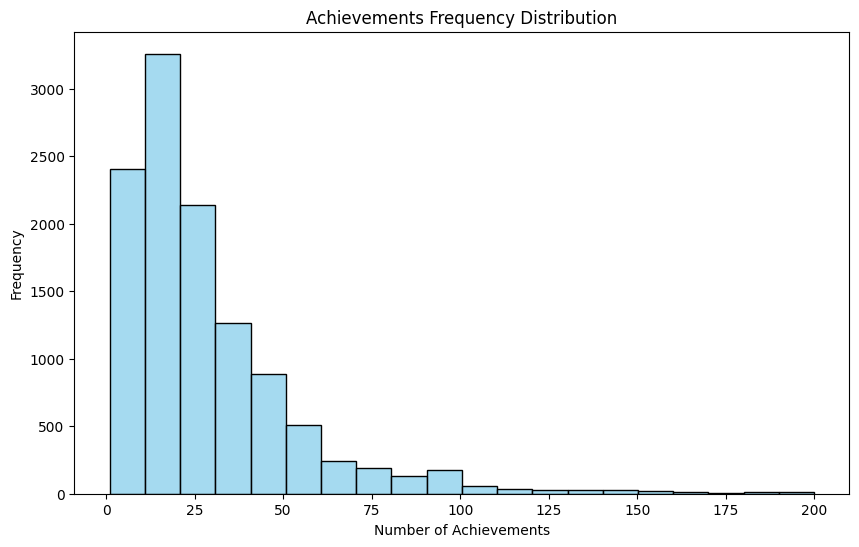

In [99]:
# Create a plot for Achievements Frequency (some values up in the 1000s that I filtered out)

filtered_df = reviews[reviews['achievements'] <= 200]


plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['achievements'].dropna(), bins=20, kde=False, color='skyblue')
plt.title('Achievements Frequency Distribution')
plt.xlabel('Number of Achievements')
plt.ylabel('Frequency')
plt.show()

In [97]:
reviews['achievements'].describe()

count    11717.000000
mean        79.444909
std        457.364437
min          1.000000
25%         12.000000
50%         21.000000
75%         38.000000
max       9821.000000
Name: achievements, dtype: float64

In [5]:
ratings = pd.read_csv('data/ratings.csv')
ratings

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,For Honor,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
2389,Victor Vran Overkill Edition,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
2390,Danganronpa 1•2 Reload,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,M
2391,Touhou Double Focus,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T


/var/folders/xb/kh9kw84n5k57h6w4jp5kr23m0000gn/T/ipykernel_48037/1371077087.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='esrb_rating', data=ratings, palette='cividis')


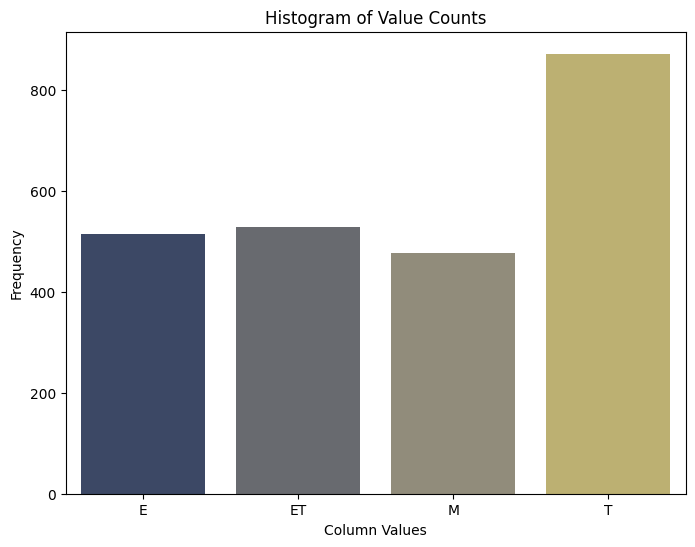

In [154]:
ratings['esrb_rating'].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(x='esrb_rating', data=ratings, palette='cividis')
plt.title('Histogram of Value Counts')
plt.xlabel('Column Values')
plt.ylabel('Frequency')
plt.show()

/var/folders/xb/kh9kw84n5k57h6w4jp5kr23m0000gn/T/ipykernel_48037/807980639.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=first.index, y=first.values, palette='viridis')


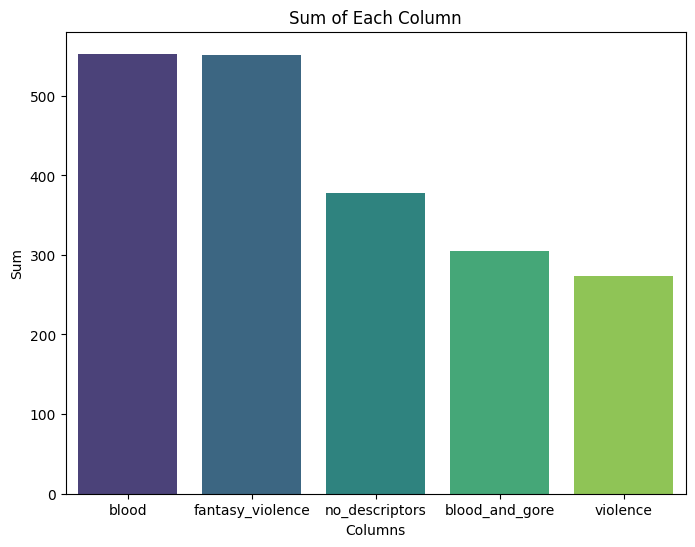

In [139]:
# Plot of the most frequent warning tags
column_sums = ratings.drop(['title', 'esrb_rating', 'console'], axis=1).sum()
sorted_columns = column_sums.sort_values(ascending=False)

first = sorted_columns.head(5)

# Create a Seaborn bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=first.index, y=first.values, palette='viridis')
plt.title('Sum of Each Column')
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.show()

In [126]:
# Frequency count of warning tags
sorted_columns

blood                       553
fantasy_violence            551
no_descriptors              378
blood_and_gore              305
violence                    274
language                    270
intense_violence            262
suggestive_themes           261
strong_janguage             250
mild_lyrics                 178
mild_blood                  172
simulated_gambling          138
crude_humor                 123
alcohol_reference           121
mild_fantasy_violence       120
sexual_themes               114
mild_suggestive_themes      104
mild_violence               104
strong_sexual_content        93
lyrics                       83
drug_reference               82
sexual_content               75
use_of_alcohol               73
mild_language                68
use_of_drugs_and_alcohol     55
partial_nudity               54
mild_cartoon_violence        51
cartoon_violence             48
nudity                       39
mature_humor                 22
animated_blood               20
dtype: i

In [143]:
# Sales Datasets:

sales2016 = pd.read_csv('data/sales2016.csv')
sales2017 = pd.read_csv('data/sales2017.csv')
s16 = sales2016.loc[:, ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales']]
s17 = sales2017.loc[:, ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales']]

sales = pd.merge(s16, s17, on=['Name', 'Platform', 'Year_of_Release', 'Genre',], how='outer', suffixes=('_2016', '_2017'))
sales['Global_Sales_2016'].fillna(0, inplace=True)
sales['Global_Sales_2017'].fillna(0, inplace=True)
sales['Global_Sales'] = sales[['Global_Sales_2016', 'Global_Sales_2017']].max(axis=1)
sales.drop(['Global_Sales_2016', 'Global_Sales_2017'], axis=1, inplace=True)
sales['Global_Sales'].replace(0, np.nan, inplace=True)
sales['Year_of_Release'] = sales['Year_of_Release'].fillna(0).astype(int)
sales

,Name,Platform,Year_of_Release,Genre,Global_Sales
0,Wii Sports,Wii,2006,Sports,82.54
1,Super Mario Bros.,NES,1985,Platform,40.24
2,Mario Kart Wii,Wii,2008,Racing,35.57
3,Wii Sports Resort,Wii,2009,Sports,32.78
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,31.37
...,...,...,...,...,...
19684,Nancy Drew: The Deadly Secret of Olde World Park,DS,2007,Adventure,0.01
19685,Fashion Designer: Style Icon,DS,2007,Simulation,0.01
19686,Ashita no Joe 2: The Anime Super Remix,PS2,2002,Fighting,0.01
19687,NadePro!! Kisama no Seiyuu Yatte Miro!,PS2,2009,Adventure,0.01


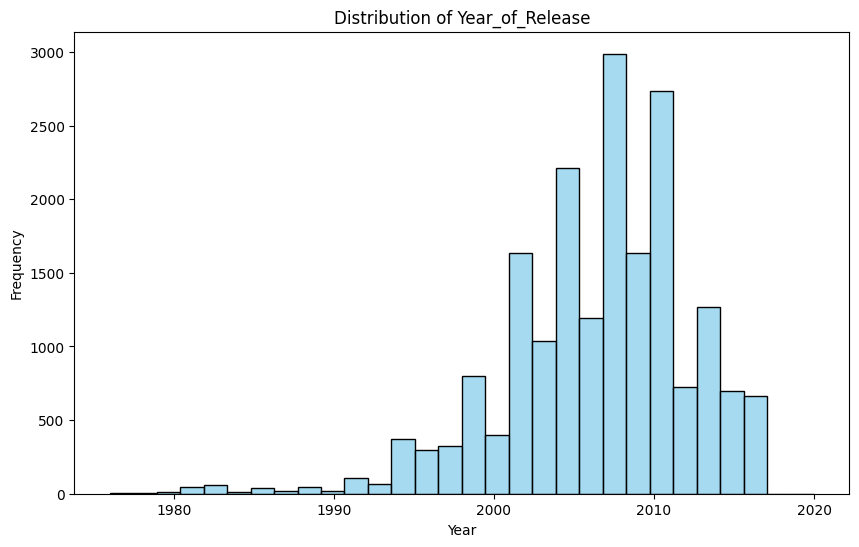

In [146]:
# Histogram for Year
filtered_sales = sales[sales['Year_of_Release'] != 0]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_sales['Year_of_Release'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Year_of_Release')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

/var/folders/xb/kh9kw84n5k57h6w4jp5kr23m0000gn/T/ipykernel_48037/964923758.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year_of_Release', data=filtered_sales, palette='plasma')


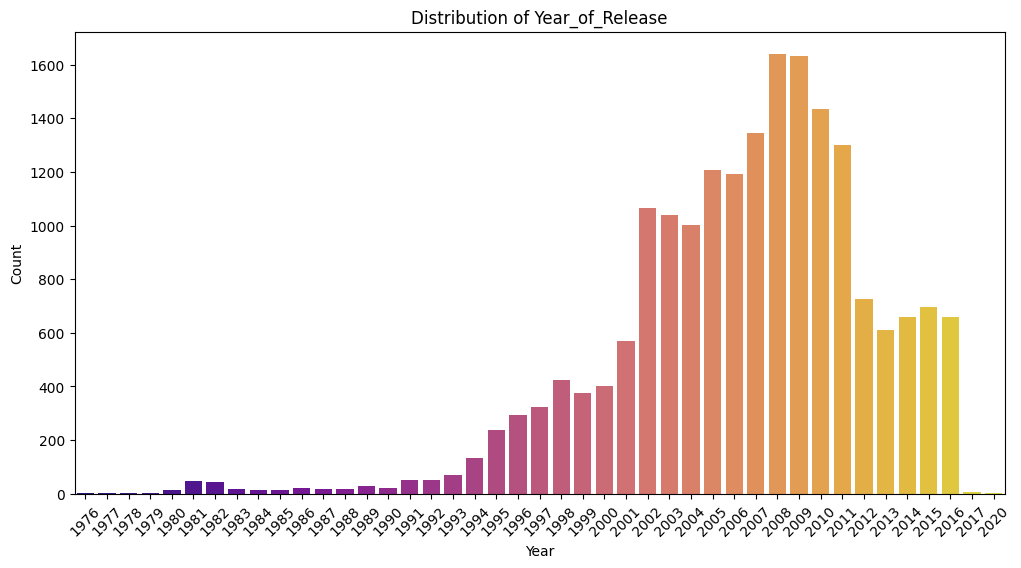

In [153]:
# Countplot for Year

plt.figure(figsize=(12, 6))
sns.countplot(x='Year_of_Release', data=filtered_sales, palette='plasma')
plt.title('Distribution of Year_of_Release')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/var/folders/xb/kh9kw84n5k57h6w4jp5kr23m0000gn/T/ipykernel_48037/421976036.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre', data=sales, palette='deep')


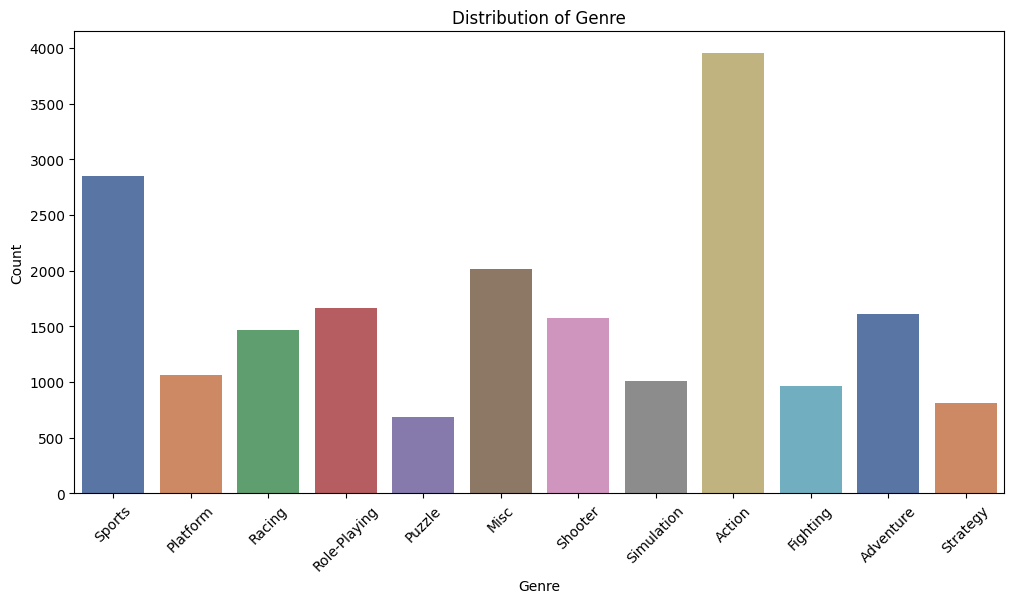

In [151]:
# Genre Countplot

plt.figure(figsize=(12, 6))
sns.countplot(x='Genre', data=sales, palette='deep')
plt.title('Distribution of Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

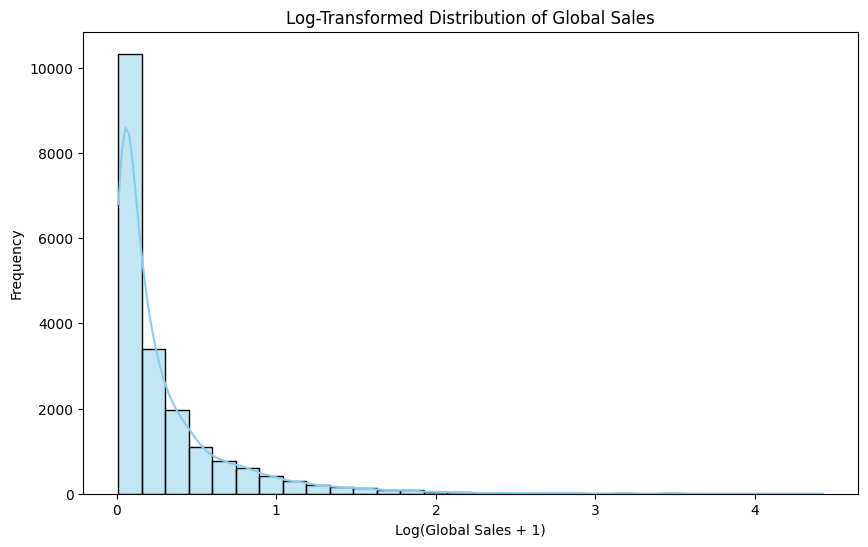

In [164]:
# Histogram of Log Sales
sales['Global_Sales_Log'] = np.log1p(sales['Global_Sales'])

# Plot the log-transformed data using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(sales['Global_Sales_Log'], bins=30, kde=True, color='skyblue')
plt.title('Log-Transformed Distribution of Global Sales')
plt.xlabel('Log(Global Sales + 1)')
plt.ylabel('Frequency')
plt.show()

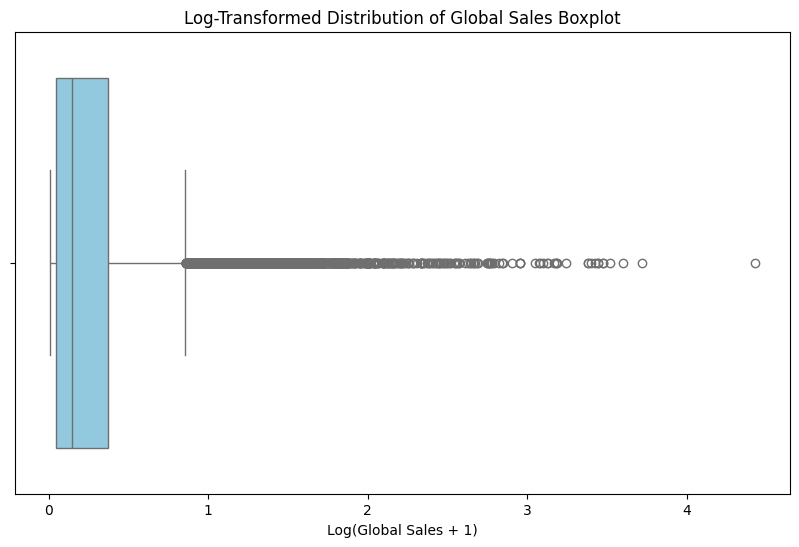

In [160]:
# Boxplot of LOG sales

sales['Global_Sales_Log'] = np.log1p(sales['Global_Sales'])
plt.figure(figsize=(10, 6))
sns.boxplot(x=sales['Global_Sales_Log'], color='skyblue')
plt.title('Log-Transformed Distribution of Global Sales Boxplot')
plt.xlabel('Log(Global Sales + 1)')
plt.show()

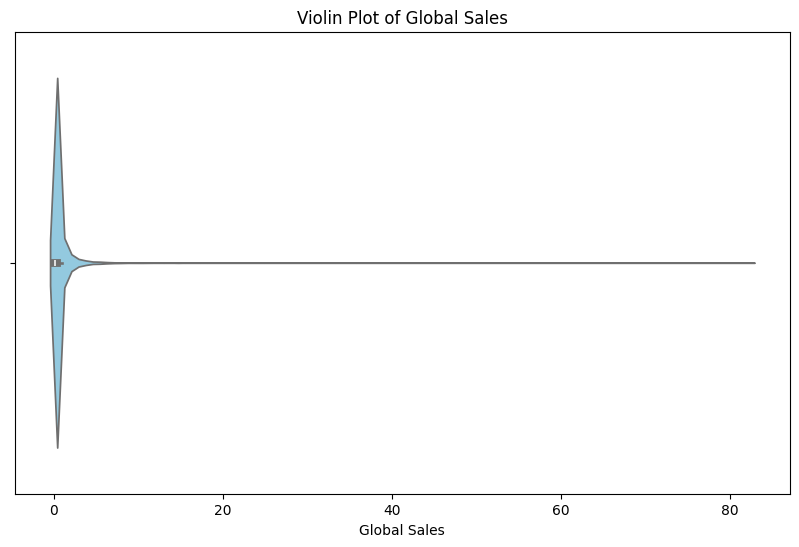

In [163]:
# Violin Plot of Sales
plt.figure(figsize=(10, 6))
sns.violinplot(x=sales['Global_Sales'], color='skyblue')
plt.title('Violin Plot of Global Sales')
plt.xlabel('Global Sales')
plt.show()

In [ ]:
def square(n):
    '''Takes in a number n, returns the square of n'''
    return n**2